2021 Takahiro Shinozaki @ Tokyo Tech

Quick introduction of running neural network speech recognizers

References:

    https://github.com/espnet/
    https://github.com/espnet/espnet_model_zoo

In [ ]:
# If you run this notebook with JupyterLab on Tsubame, uncomment the following lines
# ! module purge
# ! pip install numpy matplotlib
# ! python3 -m pip install --user torch

In [ ]:
# Install espnet_model_zoo: utilities to manage pretrained models created by ESPnet
# (You might encounter some warning/error messages. If they are harmless, you may ignore them to try speech recognition in this notebook)
! pip install espnet_model_zoo

In [ ]:
# If you run this notebook with JupyterLab on Tsubame, uncomment the following line
# ! pip install kenlm

In [ ]:
import soundfile
import string

# ESPnet interface to perform speech recognition
from espnet2.bin.asr_inference import Speech2Text
# ModelDownloader downloads pre-trained speech recognition model
from espnet_model_zoo.downloader import ModelDownloader

The languages that the speech recognition models recognize depends on the data used to train the model. 
Moreover, speech recognition performance depends on the speech utterances used to train the model and recognize. 
For example, suppose the training utterances are collected by reading newspapers. In that case, the model will be good at recognizing similar read speech utterances but not good at recognizing free telephone conversations with your friends. The domain dependency is due to the mismatches in speech utterances characteristics. 


There are many databases:
e.g.

csj: Japanese (Corpus of Spontaneous Japanease)

librispeech: English

In [ ]:
# Download a speech model and setup a speech recognition interface

# You can find a list of pre-trained speech recognition models for ESPnet at:
# https://github.com/espnet/espnet_model_zoo/blob/master/espnet_model_zoo/table.csv

tag = 'kamo-naoyuki/librispeech_asr_train_asr_conformer5_raw_bpe5000_frontend_confn_fft512_frontend_confhop_length256_scheduler_confwarmup_steps25000_batch_bins140000000_optim_conflr0.0015_initnone_sp_valid.acc.ave'
d = ModelDownloader()
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

In [ ]:
# Download some English word waveform segments for testing
# They are record as RIFF WAV file of linear PCM with 16kHz sampling frequency and 16bit quantization 
! wget http://www.ts.ip.titech.ac.jp/shinot/exercise/spolacq/samplewav/no-1.wav
! wget http://www.ts.ip.titech.ac.jp/shinot/exercise/spolacq/samplewav/apple-1.wav
! wget http://www.ts.ip.titech.ac.jp/shinot/exercise/spolacq/samplewav/orange-1.wav

In [ ]:


soundfiles = ['no-1.wav', 'apple-1.wav', 'orange-1.wav']
for f in soundfiles:
    utterance, rate = soundfile.read(f)
    assert rate == 16000, "mismatch in sampling rate"
    # First obtain N-best as the recognition result. It contains ordered candidates of recognition hypotheses
    nbests = speech2text(utterance)
    # Here, we simple extract the first recognition candidate as the recognition result
    hyp, *_ = nbests[0]
    # Print the recognition result
    print(len(utterance), hyp)

In [ ]:
# Let's try to recognize your own voice.
# As the preparation, please mount your goole drive so that you can access it from this notebook.
# When you run this code cell, you will get instruction to grant the access to this notebook.
# Please follow it.
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Once you successfully mount your goole drive, you can access it.
# For example, suppose you have a directory "mycolab" in your google drive. 
# Then, the following command will show its content.
! ls /content/drive/MyDrive/mycolab

Record your voice as a WAV format file with 16kHz sampling frequency and 16bit quantization.
You can use any voice recording software to record your voice as far as you can save your voice with WAV format.
As an option, wavesurfer is a freesoftware that is convenient for sound recording as well as analysis.
You can access the menue from "Preferences->Sound I/O".

https://sourceforge.net/projects/wavesurfer/

If you use wavesurfer, specifiy "sound default rate" to 16000 and "sound default encoding" to Lin16.

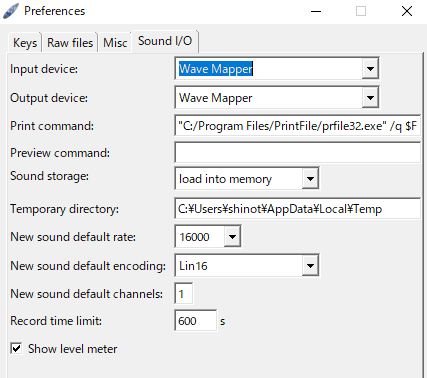

Record your voice and save it to a wav file.
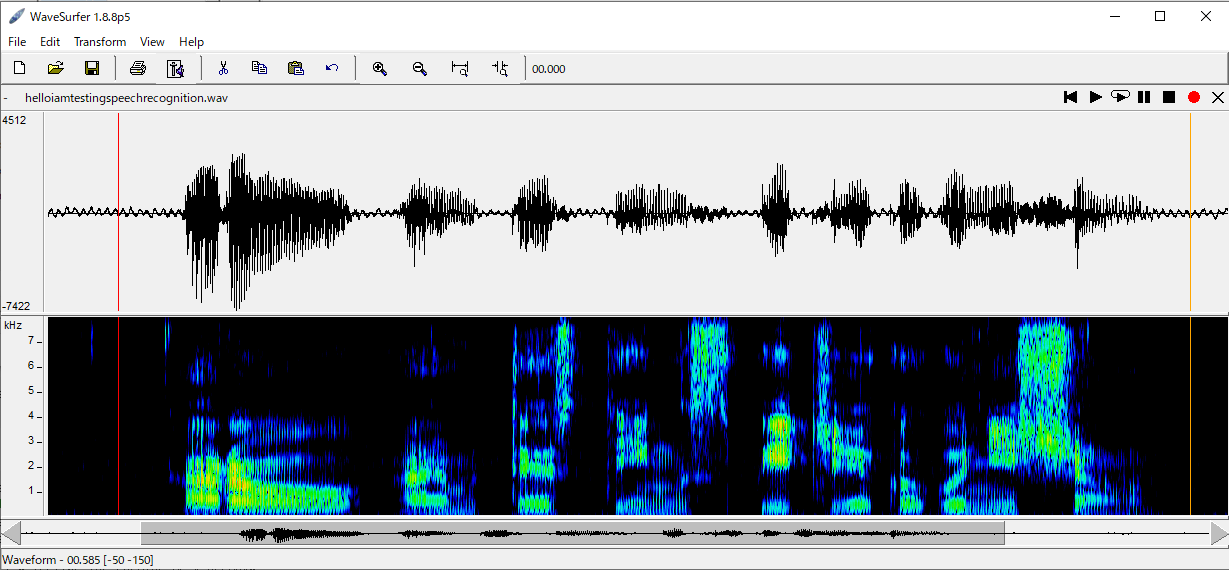

In [ ]:
# Upload your recorded wav file to your google drive.
# Here as an example, we assume that you place your record wave file helloiamtestingspeechrecognition.wav under mylab directory in your google drive.

# read the wave file
testwav, rate = soundfile.read('/content/drive/MyDrive/mycolab/helloiamtestingspeechrecognition.wav')
assert rate == 16000, "mismatch in sampling rate"


In [ ]:
# Recognize your voice
nbests = speech2text(testwav)
hyp, *_ = nbests[0]
print(len(testwav), hyp)

# How is the result?
# Try other models and compare their performance.

In [ ]:
##### Advanced #####

# See what is downloaded by ModelDownloader()
print(d.download_and_unpack(tag))